In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
btc_df = pd.read_csv('../Data/btc_final_df.csv')

In [9]:
btc_df.columns

Index(['timestamp', 'btc_exchange_netflow_usd', 'active_sending_addresses',
       'active_receiving_addresses', 'onchain_volume_usd', 'open', 'low',
       'high', 'close', 'mint_reward_usd', 'total_fee_usd',
       'transaction_count', 'exchange_to_wallet_usd', 'wallet_to_exchange_usd',
       'RV_MA_1hr', 'RV_MA_3hr', 'RV_MA_12hr', 'hourly_return', 'vol_future',
       'whale_net_usd', 'whale_net_usd_24h', 'whale_burst_flag',
       'etow_usd_log', 'etow_coins_log', 'whale_txn_count_log', 'wtoe_usd_log',
       'wtoe_coins_log', 'eth_to_btc_spill'],
      dtype='object')

### General EDA 
1) Corrrelation heatmap
2) Distribution of Feature
3) Correlation with vol future

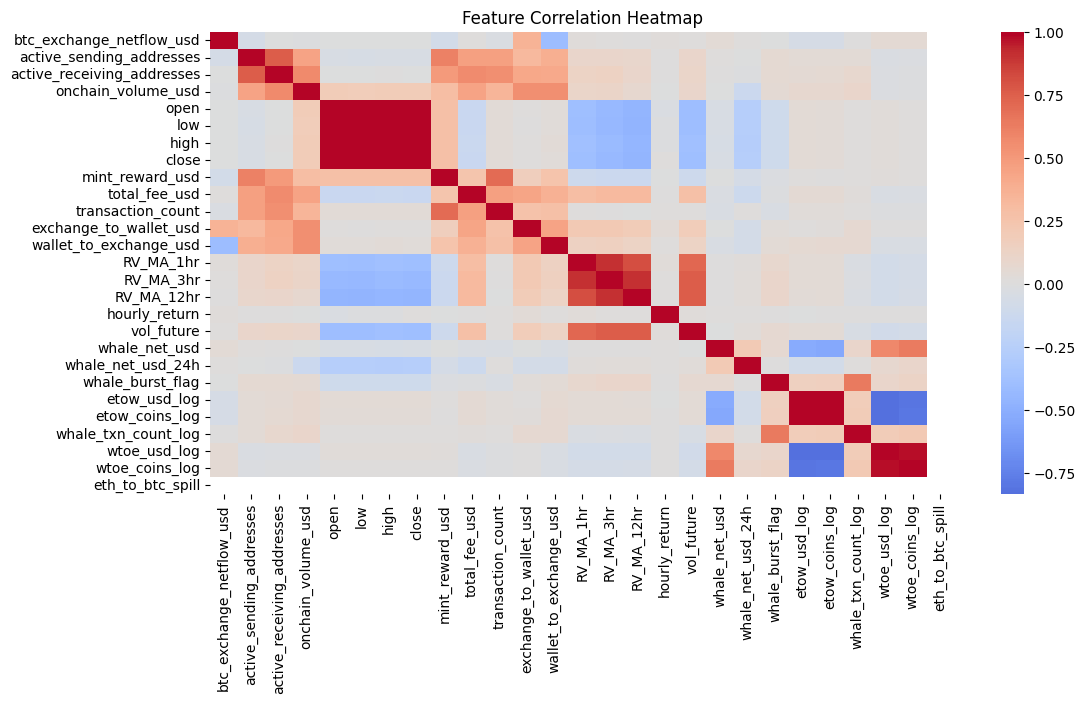

In [10]:
num_cols = btc_df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 6))
sns.heatmap(btc_df[num_cols].corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

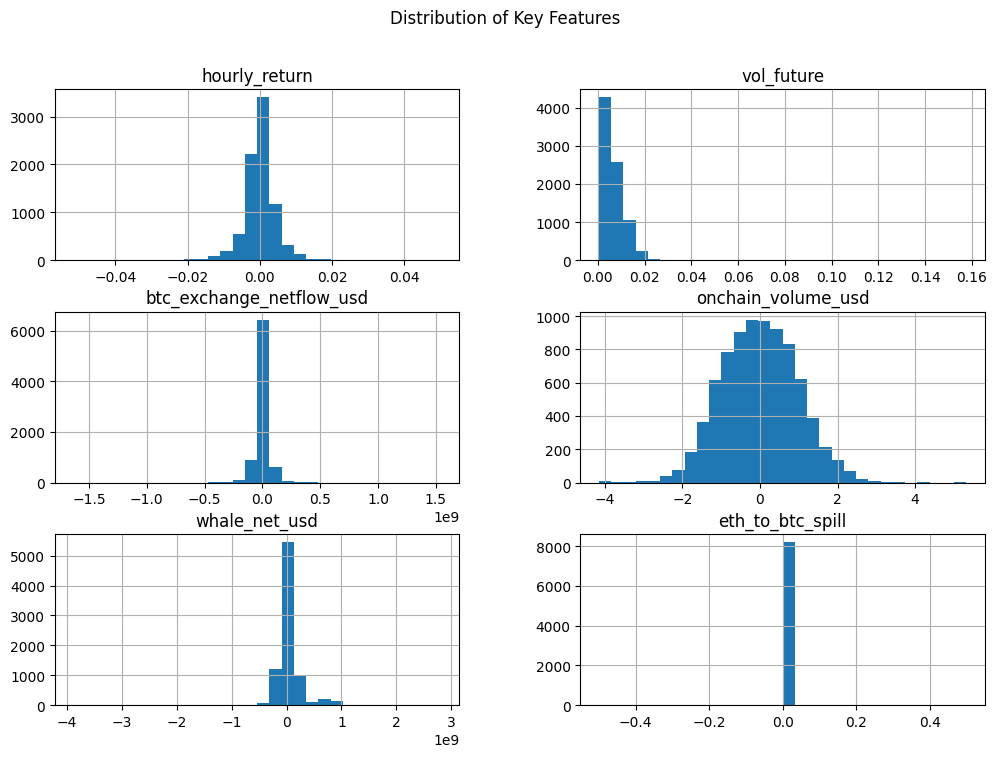

In [12]:
# Plot histograms for key numeric features
cols_to_plot = [
    "hourly_return", "vol_future", "btc_exchange_netflow_usd",
    "onchain_volume_usd", "whale_net_usd", "eth_to_btc_spill"
]
btc_df[cols_to_plot].hist(bins=30, figsize=(12, 8))
plt.suptitle("Distribution of Key Features")
plt.show()



Correlation with vol_future:
 vol_future                    1.000000
RV_MA_12hr                    0.762351
RV_MA_3hr                     0.756976
RV_MA_1hr                     0.720523
total_fee_usd                 0.279461
exchange_to_wallet_usd        0.181477
wallet_to_exchange_usd        0.128851
active_receiving_addresses    0.111814
onchain_volume_usd            0.091139
active_sending_addresses      0.091067
dtype: float64


/Users/ash/Documents/School/Y4S1/DSE4101/Project/DSE4101-CryptoWhale-2/.venv/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/ash/Documents/School/Y4S1/DSE4101/Project/DSE4101-CryptoWhale-2/.venv/lib/python3.14/site-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/var/folders/sr/m5w47sf11d525m54586gg3c00000gn/T/ipykernel_3332/1796175931.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")


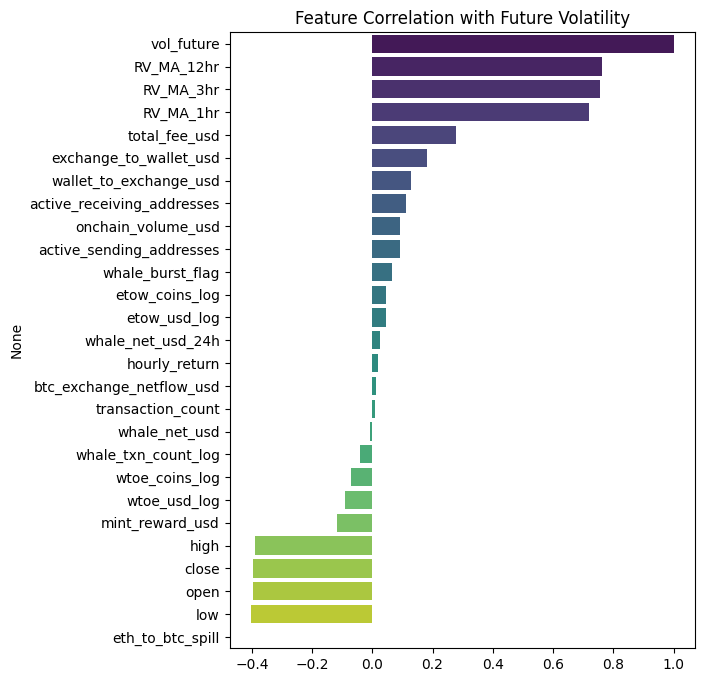

In [13]:
corr_target = btc_df[num_cols].corrwith(btc_df["vol_future"]).sort_values(ascending=False)
print("\nCorrelation with vol_future:\n", corr_target.head(10))

plt.figure(figsize=(6, 8))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="viridis")
plt.title("Feature Correlation with Future Volatility")
plt.show()
